## in this notebook we discuss two task: KNN classification task and a regressin task

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,  PredefinedSplit
from sklearn.linear_model import SGDRegressor #for stochastic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge #batch
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
from google.colab import drive
import matplotlib.pyplot as plt

# Path to a file in Google Drive
data = pd.read_csv('https://drive.google.com/uc?id=1nqSQ-M_Ff2TDD2U0syAbFBvJZuXJLWNc')


# **1 Basic Concepts**
#what is regression?
##in a regression problem a model tries to predict the output of some function.

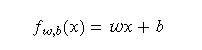
*   f(x) is the dependent variable we want to predict.
*   X is the independent variable we use to make the prediction.
* b is the
y-intercept and w is the slope of the line.


#### these parameteres should minimize some set cost function **J** for linear regression we will use the sum of squared error cost function.

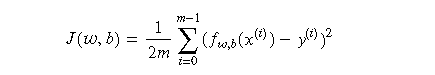

##Gradient Descent
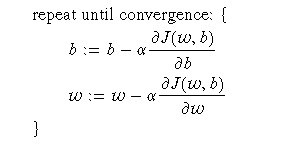



# **2 California Houses Problem**
#### in this problem we use linear regression to predict the median house price given a set of samples and corresponding features.

#split the trainging data into training , test , and validation sets

In [ ]:
#visiualize the rwa data
# Display the column headers
print(data.columns)


Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
       'Distance_to_SanJose', 'Distance_to_SanFrancisco'],
      dtype='object')


'Median_House_Value' is the value we want to predict. the rest are feetures.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define feature columns
X_features = [
    'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms',
    'Population', 'Households', 'Latitude', 'Longitude',
    'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego',
    'Distance_to_SanJose', 'Distance_to_SanFrancisco'
]

# Arrange data and split
X = data[X_features]  # Feature matrix
y = data['Median_House_Value']  # Target variable

# Transform to numpy arrays
X = X.to_numpy()  # or use X.values
y = np.array(y)

# Normalize the data for comparison later on
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split the data into 70% training, 15% test, and 15% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Split the normalized set as well
Xnorm_train, Xnorm_temp = train_test_split(X_norm, test_size=0.3, random_state=42)
Xnorm_val, Xnorm_test = train_test_split(Xnorm_temp, test_size=0.5, random_state=42)

# Visualize the data
print(f"The features of the first sample are: {X_train[1]}")
print(f"The median price is: {y_train[1]}\n")

print(f"The features of the first sample from the normalized set are: {Xnorm_train[1]}")
print(f"The median price is: {y_train[1]}")


The features of the first sample are: [ 2.86310000e+00  2.00000000e+01  2.18300000e+03  5.34000000e+02
  9.99000000e+02  4.96000000e+02  3.27900000e+01 -1.17090000e+02
  1.43449263e+04  1.76528653e+05  1.06011336e+04  6.68041340e+05
  7.36046140e+05]
The median price is: 169700.0

The features of the first sample from the normalized set are: [-0.53036314 -0.68647699 -0.20754074 -0.00925371 -0.37660163 -0.00925841
 -1.33052136  1.23769666 -0.5324573  -0.3749835  -1.33922748  1.46839372
  1.39678202]
The median price is: 169700.0


##we are going to use four very similar models: Linear, Ridge, and Lasso the Linear model is the basic Model we discussed earlier where f(x)= wx +b. the ridge and lasso models are derived from this model by adding a regularization term. the SGDR (stochastic)model uses gradient descent iteratively and not as batch.  

##for the stochastic ghradient descent we will be using the normalized data sets

In [ ]:

# Initialize models
sgdr = SGDRegressor(max_iter=2000)
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
ridge_model = Ridge(alpha=1)

# train and evaluate sgdr
sgdr.fit(Xnorm_train, y_train)
y_pred_sgdr=sgdr.predict(Xnorm_val)
mse_sgdr = mean_squared_error(y_val, y_pred_sgdr)
mae_sgdr = mean_absolute_error(y_val,y_pred_sgdr)

# Train and evaluate Linear Regression
linear_model.fit(Xnorm_train, y_train)
y_pred_linear = linear_model.predict(Xnorm_val)
mse_linear = mean_squared_error(y_val, y_pred_linear)
mae_linear = mean_absolute_error(y_val, y_pred_linear)

# Train and evaluate Lasso Regression
lasso_model.fit(Xnorm_train, y_train)
y_pred_lasso = lasso_model.predict(Xnorm_val)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)

# Train and evaluate Ridge Regression
ridge_model.fit(Xnorm_train, y_train)
y_pred_ridge = ridge_model.predict(Xnorm_val)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.244e+13, tolerance: 1.936e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Print the results
print("SGDR:")
print("MSE:", mse_sgdr)
print("MAE:", mae_sgdr)

print("\nLinear Regression:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)

print("\nLasso Regression:")
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("Selected features:", sum(lasso_model.coef_ != 0))

print("\nRidge Regression:")
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)


SGDR:
MSE: 4928222313.209413
MAE: 50848.32696497329

Linear Regression:
MSE: 4907211997.37478
MAE: 50790.06027105093

Lasso Regression:
MSE: 4907209875.578147
MAE: 50790.1825237019
Selected features: 13

Ridge Regression:
MSE: 4907280799.676527
MAE: 50793.607587626546


#Behind the code
 ## what exactly are the regularization factors in the Lasso and Ridge regressions

 ## 1 lasso regression
 #### the lasso regression( also known as the L1 regression) adds a "penalty" term to the cost function so that the cost function becomes :
 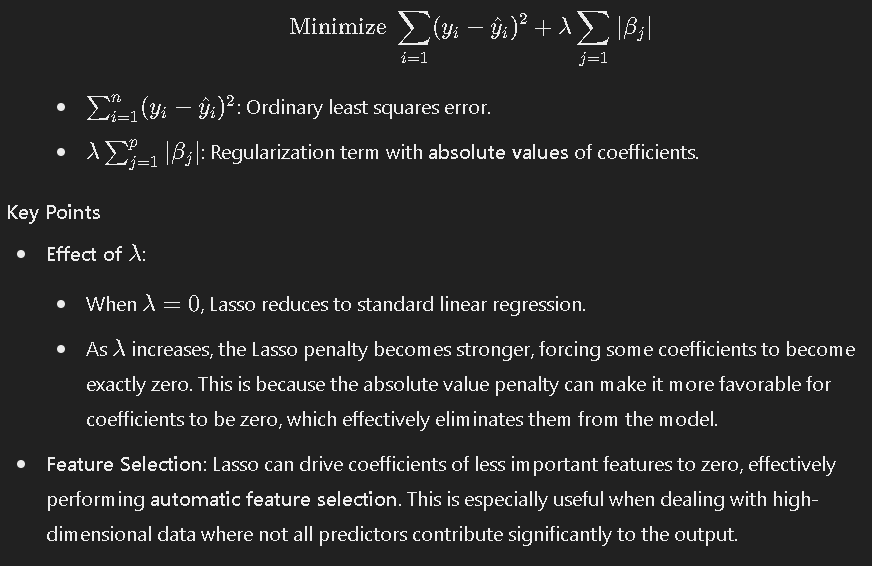

## 2 Ridge Regression

### ridge regression(also known as L2 regularization) adds a penalty based on the square of the magnitude of the coeeficients so that the cost function becomes: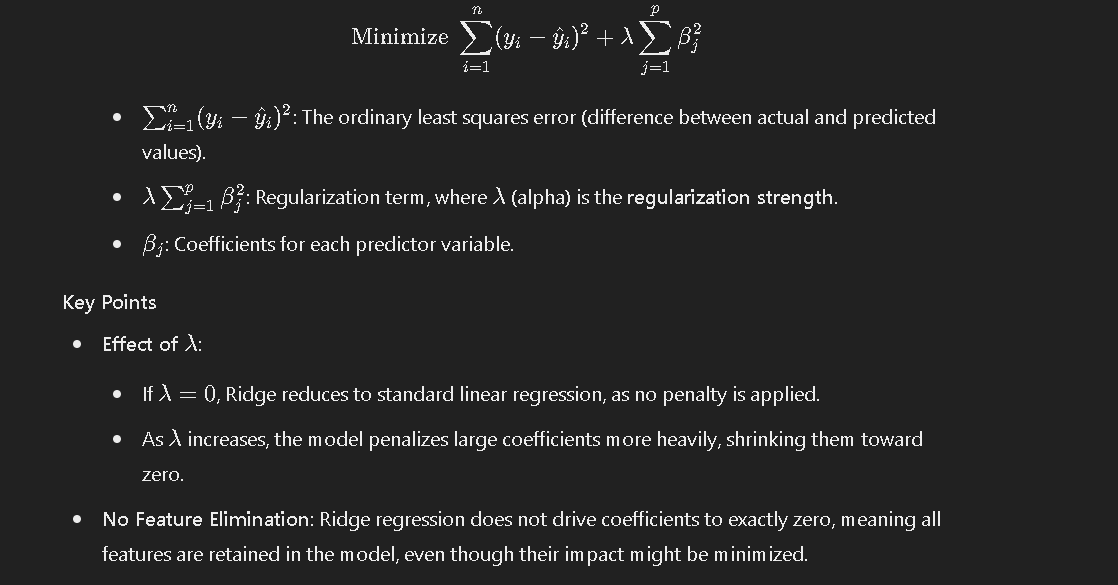

###note that the ridge regression minimizes but does not eliminate features unlike the ridge function due to the diffrentiable nature of the ridge cost function.

## but why do we need regularization?
  * to prevent overfitting
  * handling high dimensional data
  * simplifying the model as rdge regression can remove some coefficients to zero
  * reducing variance hence leading to improved better generalization
#what now?
### now we will attempt to tune the lambda parameters so that it gives reduced error

In [ ]:
import numpy as np
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

# Define a range for alpha
alpha_range = np.logspace(-4, 2, 10)

# Create scorers for MAE and MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # MAE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)    # MSE scorer

# Combine the training and validation sets
X_combined = np.concatenate([Xnorm_train, Xnorm_val])
y_combined = np.concatenate([y_train, y_val])

# Define the parameter grid using alpha_range
param_grid = {'alpha': alpha_range}

# Initialize models
model_lasso = Lasso(max_iter=10000)
model_ridge = Ridge(max_iter=10000)

# Initialize GridSearchCV for Ridge and Lasso regression with multiple scorers
grid_search_ridge = GridSearchCV(model_ridge, param_grid, scoring={'MSE': mse_scorer, 'MAE': mae_scorer}, cv=5, refit='MSE')
grid_search_lasso = GridSearchCV(model_lasso, param_grid, scoring={'MSE': mse_scorer, 'MAE': mae_scorer}, cv=5, refit='MSE')

# Fit using the combined dataset
grid_search_ridge.fit(X_combined, y_combined)
grid_search_lasso.fit(X_combined, y_combined)

# Best score and best parameters for Ridge
print("Ridge Regression:")
print("Best score (MSE):", -grid_search_ridge.best_score_)  # Negate to show as positive
print("Best parameters:", grid_search_ridge.best_params_)
print("Best MAE score:", -grid_search_ridge.cv_results_['mean_test_MAE'][grid_search_ridge.best_index_])  # Negate to show as positive

# Best score and best parameters for Lasso
print("\nLasso Regression:")
print("Best score (MSE):", -grid_search_lasso.best_score_)  # Negate to show as positive
print("Best parameters:", grid_search_lasso.best_params_)
print("Best MAE score:", -grid_search_lasso.cv_results_['mean_test_MAE'][grid_search_lasso.best_index_])  # Negate to show as positive

Ridge Regression:
Best score (MSE): 4781613598.962604
Best parameters: {'alpha': 1.0}
Best MAE score: 50188.20397156065

Lasso Regression:
Best score (MSE): 4781651958.2599125
Best parameters: {'alpha': 1.0}
Best MAE score: 50185.6559227573


## note that the results are somewhat different from previuosly manually setting the alpha. and if you set the alpha to 1 you are going to get different MSE and MAE this is due to the different splitting of the data.

##finally we validate our findings using the reserved test set.

In [ ]:
#retrain the model with the parametr that scored best
best_ridge_model = grid_search_ridge.best_estimator_
best_lasso_model = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(Xnorm_test)
y_pred_lasso = best_lasso_model.predict(Xnorm_test)

# Evaluate the Ridge model on the test set
print("Ridge Regression Test Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))

# Evaluate the Lasso model on the test set
print("\nLasso Regression Test Set Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))

Ridge Regression Test Set Evaluation:
MAE: 48843.49942153359
MSE: 4400559506.9589615
R²: 0.6672067741176396

Lasso Regression Test Set Evaluation:
MAE: 48842.4855286273
MSE: 4400791925.797452
R²: 0.667189197394749


# New Section

#classification problem


in this problem we use KNN to differentiate between two classes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:

#initialize variables to hold data#
class_g=[]
class_h=[]


In [ ]:

#read the data#
with open('data.txt','r') as file:   #alternatively we can use np.genfromtxt()...prefered to do it manually for practice
    for line in file:
        values=line.strip().split(',')
        data = list(map(float, values[:-1])) #converting to integers for later processing
        if values[-1]=='g':
            class_g.append(data + [1]) #class gamma label
        else:
            class_h.append(data + [0]) #class hedron label

FileNotFoundError: [Errno 2] No such file or directory: 'data.txt'